In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts
import requests
import time
from scipy.stats import linregress
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd



In [3]:
# File to Load (Remember to Change These)
Kansas_race_file = "Distribution_of_COVID-19_deaths_and_populations__by_jurisdiction__age__and_race_and_Hispanic_origin.csv"
Kansas_county_file = "covid_deaths_usafacts (1).csv"
# Read Purchasing File and store into Pandas data frame
Kansas_county_cases = pd.read_csv(Kansas_county_file)
Kansas_race_cases = pd.read_csv(Kansas_race_file)
# Read Purchasing File and store into Pandas data frame

df= pd.read_csv(Kansas_county_file)

In [4]:
df

,County Name,State,3/2/2021
0,Statewide Unallocated,KS,0
1,Allen County,KS,16
2,Anderson County,KS,18
3,Atchison County,KS,13
4,Barber County,KS,7
...,...,...,...
101,Washington County,KS,12
102,Wichita County,KS,6
103,Wilson County,KS,16
104,Woodson County,KS,5


In [5]:
df.nunique()

County Name    106
State            1
3/2/2021        55
dtype: int64

In [6]:
county_df=df.dropna(how="any")
county_df.head()

,County Name,State,3/2/2021
0,Statewide Unallocated,KS,0
1,Allen County,KS,16
2,Anderson County,KS,18
3,Atchison County,KS,13
4,Barber County,KS,7


In [7]:
county_df.nunique()

County Name    106
State            1
3/2/2021        55
dtype: int64

In [8]:
county_df["3/2/2021"].value_counts()
pd.set_option('display.max_rows', None)
county_df

,County Name,State,3/2/2021
0,Statewide Unallocated,KS,0
1,Allen County,KS,16
2,Anderson County,KS,18
3,Atchison County,KS,13
4,Barber County,KS,7
5,Barton County,KS,48
6,Bourbon County,KS,24
7,Brown County,KS,36
8,Butler County,KS,83
9,Chase County,KS,3


In [12]:
Total_Deaths=county_df.sort_values("3/2/2021",ascending=False )
pd.set_option('display.max_rows', None)
Total_Deaths["County Name"].array

<PandasArray>
[      'Johnson County ',      'Sedgwick County ',       'Shawnee County ',
     'Wyandotte County ',          'Reno County ',        'Saline County ',
        'Cowley County ',        'Butler County ',     'McPherson County ',
          'Lyon County ',
 ...
       'Woodson County ',         'Kiowa County ',       'Wallace County ',
       'Lincoln County ',        'Jewell County ',         'Chase County ',
         'Smith County ',      'Hamilton County ',       'Greeley County ',
 'Statewide Unallocated']
Length: 106, dtype: object

In [13]:
Total_Deaths["3/2/2021"].array
pd.set_option('display.max_rows', None)
Total_Deaths["3/2/2021"]

46     744
87     695
89     340
105    266
78     139
85     132
18      98
8       83
57      83
56      79
23      78
52      77
19      75
28      72
26      72
63      69
29      67
40      61
66      55
96      49
50      48
5       48
11      47
61      41
21      39
81      38
30      37
7       36
31      35
88      34
44      32
75      28
14      28
84      27
69      27
15      26
27      24
76      24
58      24
6       24
59      23
74      23
67      22
22      22
86      22
32      22
64      21
39      20
70      20
16      18
2       18
62      18
34      17
99      17
97      17
1       16
103     16
43      15
68      15
73      14
35      14
79      14
48      13
83      13
37      13
72      13
12      13
3       13
80      12
82      12
101     12
90      12
24      12
71      11
47      11
91      11
20      11
60      10
65       9
17       9
93       9
95       9
41       9
98       8
77       8
54       8
51       7
42       7
33       7
13       7
94       7

In [14]:
county=['Allen County', 'Anderson County', 'Atchison County', 'Barber County', 'Barton County', 'Bourbon County', 'Brown County', 'Butler County', 'Chase County', 'Chautauqua County', 'Cherokee County', 'Cheyenne County', 'Clark County ', 'Clay County', 'Cloud County', 'Coffey County', 'Comanche County', 'Cowley County', 'Crawford County', 'Decatur County', 'Dickinson County', 'Doniphan County', 'Douglas County', 'Edwards County', 'Elk County', 'Ellis County', 'Ellsworth County', 'Finney County', 'Ford County', 'Franklin County', 'Geary County', 'Gove County', 'Graham County', 'Grant County', 'Gray County', 'Greeley County', 'Greenwood County', 'Hamilton County', 'Harper County', 'Harvey County', 'Haskell County', 'Hodgeman County', 'Jackson County', 'Jefferson County', 'Jewell County', 'Johnson County', 'Kearny County', 'Kingman County', 'Kiowa County', 'Labette County', 'Lane County', 'Leavenworth County', 'Lincoln County', 'Linn County', 'Logan County', 'Lyon County', 'McPherson County', 'Marion County', 'Marshall County', 'Meade County', 'Miami County', 'Mitchell County', 'Montgomery County', 'Morris County', 'Morton County', 'Nemaha County', 'Neosho County', 'Ness County', 'Norton County', 'Osage County', 'Osborne County', 'Ottawa County', 'Pawnee County', 'Phillips County', 'Pottawatomie County', 'Pratt County', 'Rawlins County', 'Reno County', 'Republic County', 'Rice County', 'Riley County', 'Rooks County', 'Rush County', 'Russell County', 'Saline County', 'Scott County', 'Sedgwick County', 'Seward County', 'Shawnee County', 'Sheridan County', 'Sherman County', 'Smith County', 'Stafford County', 'Stanton County', 'Stevens County', 'Sumner County', 'Thomas County', 'Trego County', 'Wabaunsee County', 'Wallace County ', 'Washington County', 'Wichita County', 'Wilson County', 'Woodson County', 'Wyandotte County']

Deaths=['0', '16'
'18', 
'13', 
'7', 
'48', 
'24', 
'36', 
'83', 
'3', 
'6', 
'47', 
'13', 
'7', 
'28', 
'26', 
'18', 
'9', 
'98', 
'75', 
'11', 
'39', 
'22', 
'78', 
'12', 
'5', 
'72', 
'24', 
'72', 
'67', 
'37', 
'35', 
'22', 
'7', 
'17', 
'14', 
'1', 
'13', 
'1', 
'20', 
'61', 
'9', 
'7', 
'15', 
'32', 
'4', 
'744', 
'11', 
'13', 
'5', 
'48', 
'7', 
'77', 
'4', 
'8', 
'6', 
'79', 
'83', 
'24', 
'23', 
'10', 
'41', 
'18', 
'69', 
'21', 
'9', 
'55', 
'22', 
'15', 
'27', 
'20', 
'11', 
'13', 
'14', 
'23', 
'28', 
'24', 
'8', 
'139', 
'14', 
'12', 
'38', 
'12', 
'13', 
'27', 
'132', 
'22', 
'695', 
'34', 
'340', 
'12', 
'11', 
'2', 
'9', 
'7', 
'9', 
'49', 
'17', 
'8', 
'17', 
'4', 
'12', 
'6', '16', 
'5', '266']


Final_df=pd.DataFrame({"County":county,
                       "Deaths":Deaths})

Final_df.head()

,County,Deaths
0,Allen County,0
1,Anderson County,1618
2,Atchison County,13
3,Barber County,7
4,Barton County,48


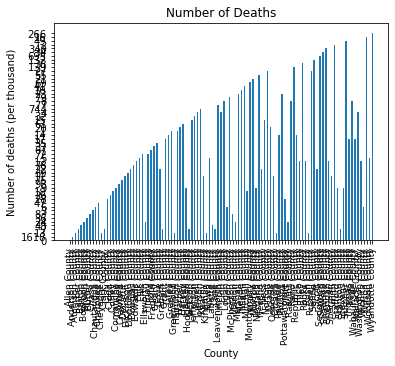

In [15]:
Counties = Final_df["County"]
Cases_load = Final_df["Deaths"]
plt.title("Number of Deaths")
plt.ylabel("Number of deaths (per thousand)")
plt.xlabel("County")
width = 0.5 
plt.xticks(rotation=90)
plt.bar(Counties, Cases_load, width)
plt.tick_params(axis="x", which="major", labelsize=9)

plt.show()

Text(0.5, 1.0, 'Percentage of deaths per county')

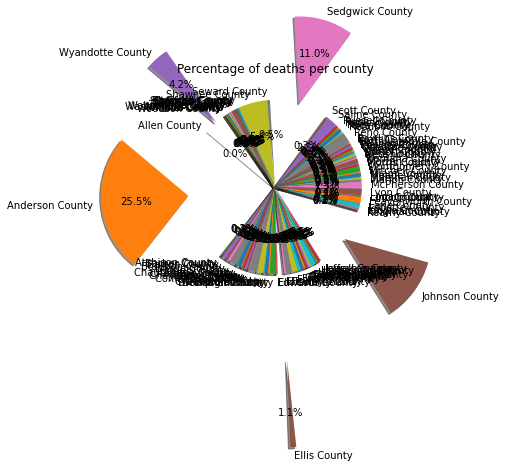

In [20]:
#Pie chart of the percentage(%)
sizes=Final_df["Deaths"]

labels=Final_df["County"].unique()

explode= (0,1,0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	2,	0, 0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1)

plt.pie(sizes, labels=labels,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of deaths per county")